In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.integrate import solve_ivp


# Question 1

In [4]:
def mandelbrot(x_lim=[-2, 2], y_lim=[-2, 2], x_width=0.003, y_width=0.003, max_iter=500, thresh=1e2):
    """
    Compute the Mandelbrot set escape times and convergence mask over a complex plane region.

    Parameters
    ----------
    x_lim : list of float, optional
        The lower and upper bounds of the real axis. Default is [-2, 2].
    y_lim : list of float, optional
        The lower and upper bounds of the imaginary axis. Default is [-2, 2].
    x_width : float, optional
        The resolution (step size) along the real axis. Smaller values give higher resolution.
        Default is 0.001.
    y_width : float, optional
        The resolution (step size) along the imaginary axis. Default is 0.001.
    max_iter : int, optional
        The maximum number of iterations to check for divergence. Default is 500.
    thresh : float, optional
        The threshold above which a point is considered to have diverged. Default is 1e2.

    Returns
    -------
    converged_mask : ndarray of bool
        A 2D boolean array indicating which complex points did not diverge (i.e., are in the Mandelbrot set).
    escape_time : ndarray of int
        A 2D integer array storing the iteration count at which each point diverged.
        Points that never diverged will have an escape time of 0.

    Examples
    --------
    >>> mask, escape = mandelbrot()
    >>> import matplotlib.pyplot as plt
    >>> plt.imshow(mask, extent=[-2, 2, -2, 2])
    >>> plt.title("Mandelbrot Set")
    >>> plt.show()
    """
    x = np.arange(x_lim[0], x_lim[1], x_width)
    y = np.arange(y_lim[0], y_lim[1], y_width)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    Z = np.zeros_like(C, dtype=np.complex128)
    escape_time = np.zeros(C.shape, dtype=int)
    mask = np.full(C.shape, True, dtype=bool)

    for i in range(1, max_iter + 1):
        Z[mask] = Z[mask]**2 + C[mask]
        diverged = np.abs(Z) > thresh
        escape_time[mask & diverged] = i
        mask[mask & diverged] = False

    converged_mask = escape_time == 0  # These points never diverged

    return converged_mask, escape_time


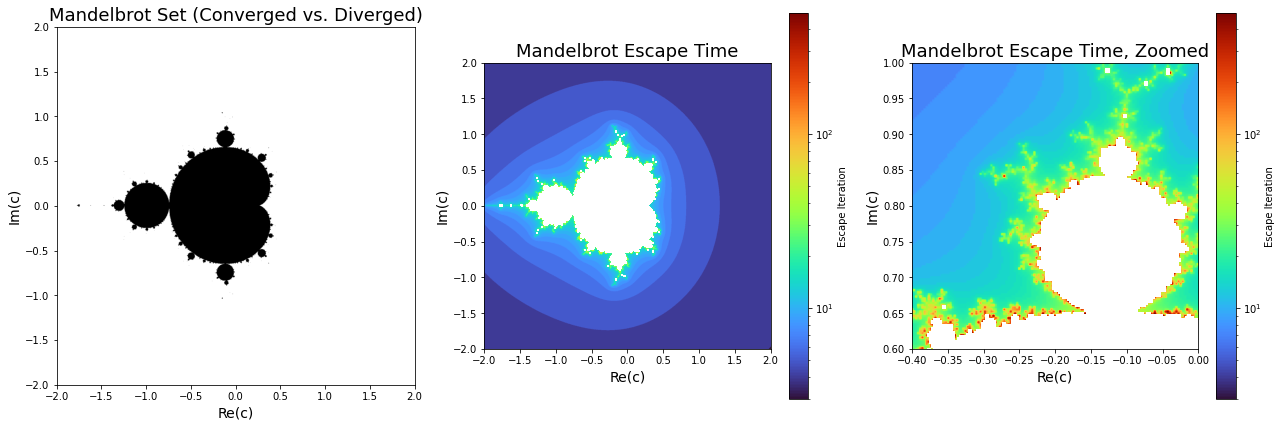

In [5]:
converged_mask, escape_time = mandelbrot()

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Binary convergence mask
im1 = ax1.imshow(converged_mask, extent=[-2, 2, -2, 2], cmap='binary', origin='lower')
ax1.set_title("Mandelbrot Set (Converged vs. Diverged)", fontsize=18)
ax1.set_xlabel("Re(c)", fontsize=14)
ax1.set_ylabel("Im(c)", fontsize=14)

# Plot 2: Escape time (full)
masked_escape = np.ma.masked_where(escape_time == 0, escape_time)

im2 = ax2.imshow(masked_escape, extent=[-2, 2, -2, 2], cmap='turbo', origin='lower', norm=LogNorm())
fig.colorbar(im2, ax=ax2, label="Escape Iteration")
ax2.set_title("Mandelbrot Escape Time", fontsize=18)
ax2.set_xlabel("Re(c)", fontsize=14)
ax2.set_ylabel("Im(c)", fontsize=14)


# Plot 3: Escape time (zoomed)
im3 = ax3.imshow(masked_escape, extent=[-2, 2, -2, 2], cmap='turbo', origin='lower', norm=LogNorm())
fig.colorbar(im3, ax=ax3, label="Escape Iteration")
ax3.set_title("Mandelbrot Escape Time, Zoomed", fontsize=18)
ax3.set_xlabel("Re(c)", fontsize=14)
ax3.set_ylabel("Im(c)", fontsize=14)
ax3.set_xlim(-0.4, 0.0)
ax3.set_ylim(0.6, 1.0)

plt.tight_layout()
plt.show()

# Question 2

In [6]:
# Parameters (you can adjust these)
sigma = 10.
r = 28.
b = 8. / 3.

# Time parameters
t_end = 60
dt = 0.01
t_eval = np.arange(0, t_end, dt)

def lorenz(t, state):
    """
    Compute the time derivatives for the Lorenz system of equations.

    The Lorenz system is a set of three coupled, nonlinear differential equations
    originally developed to model atmospheric convection. It is a classic example
    of a chaotic system.

    Parameters
    ----------
    t : float
        Time variable (not used explicitly, but included for compatibility with ODE solvers).
    state : array_like of float, shape (3,)
        Current state of the system [x, y, z], where:
        - x is proportional to the convective intensity,
        - y is proportional to the temperature difference,
        - z is proportional to the vertical temperature profile.

    Returns
    -------
    derivatives : list of float, shape (3,)
        Time derivatives [dx/dt, dy/dt, dz/dt] of the Lorenz system.

    Notes
    -----
    The system is governed by the equations:
        dx/dt = -σ(x - y)
        dy/dt = r x - y - x z
        dz/dt = -b z + x y

    where σ, r, and b are parameters typically associated with convection, heating,
    and dissipation, respectively.
    """
    x, y, z = state
    dxdt = -sigma * (x - y)
    dydt = r * x - y - x * z
    dzdt = -b * z + x * y
    return [dxdt, dydt, dzdt]



## Reproducing Figure 1

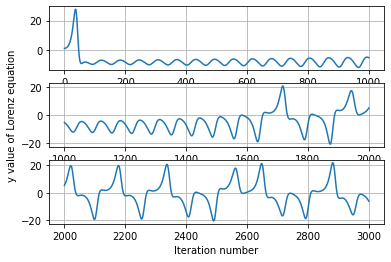

In [7]:


# Initial conditions
initial_state = [0., 1., 0.]

# Solve the system
W = solve_ivp(lorenz, [0, t_end], initial_state, t_eval=t_eval)


fig, ax = plt.subplots(nrows=3, ncols=1)

t_1 = np.linspace(0,1000,1000)
t_2 = t_1+1000
t_3 = t_2 + 1000

ax[0].plot(t_1, W.y[1][:1000])

ax[1].plot(t_2, W.y[1][1000:2000])

ax[1].set_ylabel("y value of Lorenz equation")
ax[2].plot(t_3, W.y[1][2000:3000])
ax[2].set_xlabel("Iteration number")

ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()



## Reproducing Figure 2

In [8]:
t_min = 0
t_max = 25
dt = 0.01
N = int(t_max/dt)

t_eval = np.linspace (t_min, t_max, N)


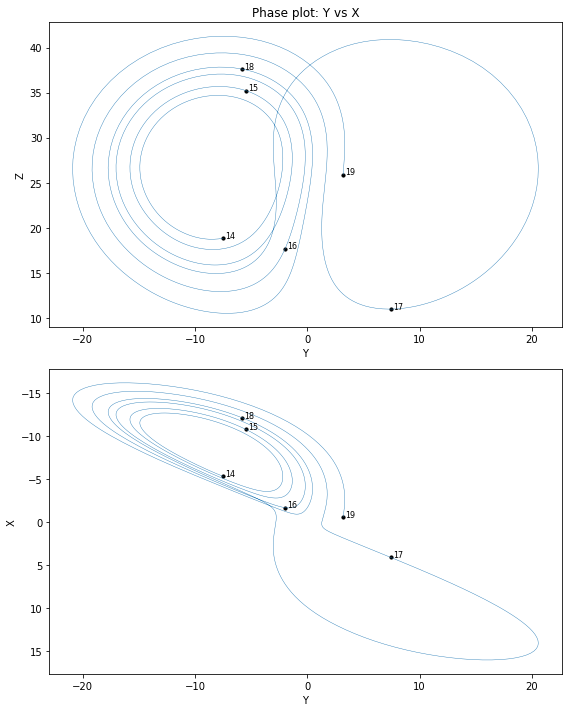

In [9]:
# Solve the system with dense output for interpolation
sol = solve_ivp(lorenz, [0, t_max], initial_state, dense_output=True)

# Time range for plotting
start_t = 14
end_t = 19
t_dense = np.linspace(start_t, end_t, 1000)
x_dense, y_dense, z_dense = sol.sol(t_dense)

# Time labels to annotate
label_times = [14, 15, 16, 17, 18, 19]
x_labels, y_labels, z_labels = sol.sol(label_times)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# First plot: Y vs Z
ax1.plot(y_dense, z_dense, lw=0.4)
ax1.set_xlabel('Y')
ax1.set_ylabel('Z')
ax1.set_title('Phase plot: Y vs Z')
for i, t_val in enumerate(label_times):
    ax1.scatter(y_labels[i], z_labels[i], s=10, c='black')
    ax1.text(y_labels[i] + 0.2, z_labels[i], f"{t_val}", fontsize=8, color='black')

# Second plot: Y vs -X
ax2.plot(y_dense, x_dense, lw=0.4)
ax2.set_xlabel('Y')
ax2.set_ylabel('X')
ax2.invert_yaxis()
ax1.set_title('Phase plot: Y vs X')
for i, t_val in enumerate(label_times):
    ax2.scatter(y_labels[i], x_labels[i], s=10, c='black')
    ax2.text(y_labels[i] + 0.2, x_labels[i], f"{t_val}", fontsize=8, color='black')

plt.tight_layout()
plt.show()

## Figure 3

In [10]:
init_new = np.array(initial_state) + np.array((0,1e-8,0))
t_eval = np.linspace(0,60,int(60/dt))

In [11]:
W_new = solve_ivp(lorenz, [0, t_end], init_new, t_eval=t_eval)
W_old =  solve_ivp(lorenz, [0, t_end], initial_state, t_eval=t_eval)

d = (np.sum((np.abs(W_new.y-W_old.y))**2,0))


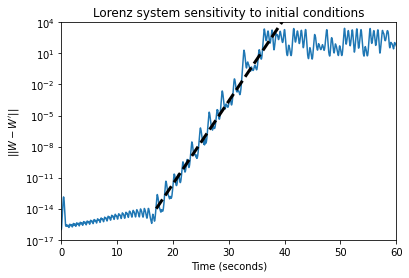

In [12]:
plt.plot(t_eval,d)
plt.yscale("log")
x_vals = np.linspace(0.01,60,100)
plt.plot(x_vals+17,10**(0.8*x_vals-14),ls="--",lw=3,c="black")
plt.title("Lorenz system sensitivity to initial conditions")
plt.ylabel("$||W - W'||$")
plt.xlabel("Time (seconds)")
plt.xlim(0,60)
plt.ylim(1e-17,1e4)
plt.show()